# Machine Learning Examination

In [287]:
#Name: Mwanje Musa
#Reg No: MAY22/MSC/1615U
#Programme: MSc. COMP (CS)

# a) Import the necessary python libraries (2 marks)

In [288]:
import requests
import lxml.html as lh
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# b) Remove the Website and put the table in Notebook (4 marks)

In [289]:
ebola_data ='https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease'

page =requests.get(ebola_data)

doc = lh.fromstring(page.content)

tr_elements = doc.xpath('//tr')

[len(T) for T in tr_elements[:12]]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [290]:
#check the table header

tr_elements = doc.xpath('//tr')

col = []
i = 0

for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Year
2:Country
3:EVD
4:Cases
5:Deaths
6:Case fatality 


In [291]:
#Check the data in other rows
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=6: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

In [292]:
#To see the No of Rows and Columns
[len(C) for (title,C) in col]

[41, 41, 41, 41, 41, 41]

# c) Displays the data frame with 

In [293]:
#Create a dataframe and read the file
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

# First 10 records (2 marks)
df.head(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2021,Guinea,Zaire,Ongoing,,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42%
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66%
4,2018,Democratic Republic of the Congo,Zaire,54,33,61%
5,2017,Democratic Republic of the Congo,Zaire,8,4,50%
6,2015,Italy,Zaire,1,0,0%
7,2014,Spain,Zaire,1,0,0%
8,2014,UK,Zaire,1,0,0%
9,2014,USA,Zaire,4,1,25%


In [294]:
# Last 10 records (2 marks)
df.tail(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
31,1996,South Africa (ex-Gabon),Zaire,1,1,100%
32,1996 (Jul-Dec),Gabon,Zaire,60,45,75%
33,1996 (Jan-Apr),Gabon,Zaire,31,21,68%
34,1995,Democratic Republic of the Congo,Zaire,315,254,81%
35,1994,Côte d'Ivoire,Taï Forest,1,0,0%
36,1994,Gabon,Zaire,52,31,60%
37,1979,Sudan,Sudan,34,22,65%
38,1977,Democratic Republic of the Congo,Zaire,1,1,100%
39,1976,Sudan,Sudan,284,151,53%
40,1976,Democratic Republic of the Congo,Zaire,318,280,88%


# d) Clean the data set (8 marks)

In [295]:
df.shape

(41, 6)

In [296]:
#Remove row 0
dfc =df.drop([df.index[0]])
dfc.head(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42%
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66%
4,2018,Democratic Republic of the Congo,Zaire,54,33,61%
5,2017,Democratic Republic of the Congo,Zaire,8,4,50%
6,2015,Italy,Zaire,1,0,0%
7,2014,Spain,Zaire,1,0,0%
8,2014,UK,Zaire,1,0,0%
9,2014,USA,Zaire,4,1,25%
10,2014,Senegal,Zaire,1,0,0%


In [297]:
# Removing fields with NaN, empty cells, non meaning full rows etc
df = dfc.drop([1,3,13,14,15,16,26,27,28,29,32,33])
df['Cases'] = df['Cases'].str.strip()
df['Deaths'] = df['Deaths'].str.strip()
df['Year'] = df['Year'].str.replace(r"\(.*\)","")
df.iloc[:,5] =df.iloc[:,5].str.replace(r"%","")
df.iloc[:,5] =df.iloc[:,5].str.strip()
df['Year'] = df['Year'].str.strip()

df['Year'] = pd.to_numeric(df['Year'])
df['Cases'] = pd.to_numeric(df['Cases'])
df['Deaths'] = pd.to_numeric(df['Deaths'])
df.iloc[:,5] =pd.to_numeric(df.iloc[:,5])
df.head()

/var/folders/jd/tc3c_86n42jc_mmcmstnnxz80000gn/T/ipykernel_96264/1143406524.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Year'] = df['Year'].str.replace(r"\(.*\)","")


,Year,Country,EVD,Cases,Deaths,Case fatality
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
4,2018,Democratic Republic of the Congo,Zaire,54,33,61
5,2017,Democratic Republic of the Congo,Zaire,8,4,50
6,2015,Italy,Zaire,1,0,0
7,2014,Spain,Zaire,1,0,0


# e) Produce the descriptive statistical table values. (2 marks)

In [298]:
df.describe()

,Year,Cases,Deaths,Case fatality
count,28.000000,28.000000,28.000000,28.000000
mean,2004.250000,79.357143,49.178571,51.285714
std,13.470475,122.739475,84.257565,31.622609
min,1976.000000,1.000000,0.000000,0.000000
25%,1995.750000,1.000000,1.000000,36.250000
50%,2009.500000,18.500000,9.000000,53.000000
75%,2014.000000,75.250000,34.000000,72.000000
max,2020.000000,425.000000,280.000000,100.000000


# f) Check the correlations between the features (2 marks)

In [299]:
df.corr()

,Year,Cases,Deaths,Case fatality
Year,1.000000,-0.402559,-0.450331,-0.410217
Cases,-0.402559,1.000000,0.956410,0.228855
Deaths,-0.450331,0.956410,1.000000,0.308946
Case fatality,-0.410217,0.228855,0.308946,1.000000


# g) Generate the regression plots between variables.  (2 marks)

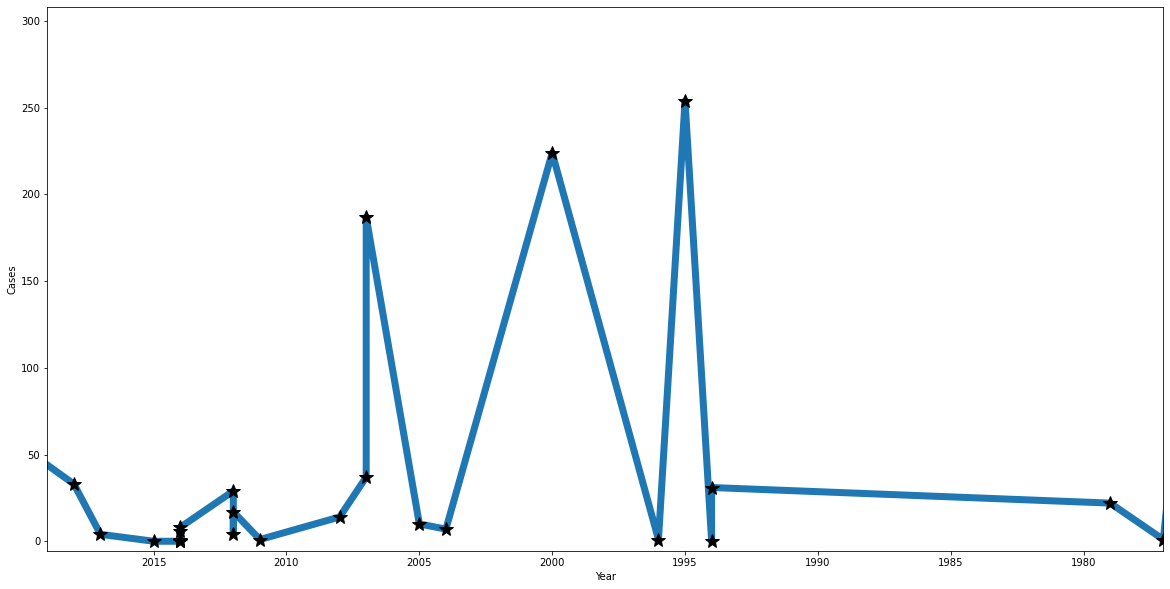

In [300]:
plt.figure(figsize = (20,10))

x = df.Year
y = df.Deaths

plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')

plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])

plt.xlabel('Year')
plt.ylabel('Cases')

plt.rcParams.update({'font.size': 26})
plt.show()

# h) Generate a heatmap for the correlations of features. (4 marks)

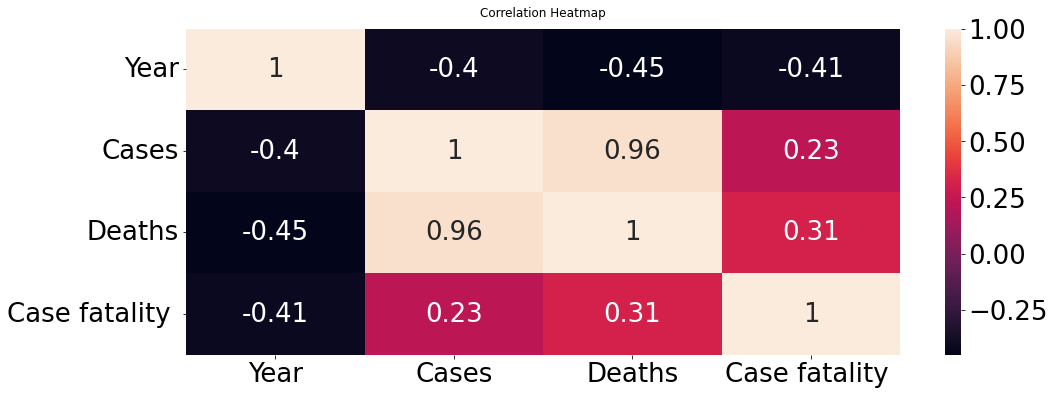

In [301]:
#this figure helps us to relate the correelation between features
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method ='pearson'), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# i) Produce Simple Linear Regression model to show relationship between the two features that are strongly correlated. (4 marks)

In [302]:
df.corr(method ='pearson')

,Year,Cases,Deaths,Case fatality
Year,1.000000,-0.402559,-0.450331,-0.410217
Cases,-0.402559,1.000000,0.956410,0.228855
Deaths,-0.450331,0.956410,1.000000,0.308946
Case fatality,-0.410217,0.228855,0.308946,1.000000


# j) Compute the slope and the intercept of your graph and deduce your model in the form y=mx+c  (4 marks)


In [303]:
# dependent variable for y axis
y = df['Cases']
# independent variable for x axis
x = np.c_[df['Year']]

In [304]:
#fitting a simple regression model for predicting popluation using year
lm = LinearRegression()
lm_model = lm.fit(x,y)

print ('The slope of line is:', lm_model.coef_)
print ('The y-intercept is:',lm_model.intercept_)

The slope of line is: [-3.66801041]
The y-intercept is: 7430.967006611799


# k) Evaluate your model and make a conclusion based on R-square and Mean Square Error values. (4 marks)

In [305]:
#prediction
year_X = np.c_[2028]
pred_model = lm.predict(year_X)
pred_model

array([-7.75810437])

In [306]:
print('MAE', metrics.mean_absolute_error(pred_model,year_X))
print('RMSE',np.sqrt(metrics.mean_squared_error(pred_model,year_X)))

MAE 2035.7581043745759
RMSE 2035.7581043745759


In [307]:
df.head()

,Year,Country,EVD,Cases,Deaths,Case fatality
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
4,2018,Democratic Republic of the Congo,Zaire,54,33,61
5,2017,Democratic Republic of the Congo,Zaire,8,4,50
6,2015,Italy,Zaire,1,0,0
7,2014,Spain,Zaire,1,0,0


# SECTION B

# Question Five

# a) Import necessary libraries for Logistic Regression algorithm. (5 marks)

In [423]:
!pip install six

In [441]:
import pylab as pl 
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 

 
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# b) Produce the Logistic Regression model. (5 marks)

In [442]:
df.head()

,Year,Country,EVD,Cases,Deaths,Case fatality
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
4,2018,Democratic Republic of the Congo,Zaire,54,33,61
5,2017,Democratic Republic of the Congo,Zaire,8,4,50
6,2015,Italy,Zaire,1,0,0
7,2014,Spain,Zaire,1,0,0


In [443]:
X = np.asarray(df[[ 'Cases','Deaths']])
X[0:5]

array([[130,  55],
       [ 54,  33],
       [  8,   4],
       [  1,   0],
       [  1,   0]])

In [444]:
y = np.asarray(df['Year'])
y [0:5]

array([2020, 2018, 2017, 2015, 2014])

In [445]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.42017583,  0.0703587 ],
       [-0.21038423, -0.19553675],
       [-0.59203901, -0.5460353 ],
       [-0.65011691, -0.59437993],
       [-0.65011691, -0.59437993]])

In [446]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (22, 2) (22,)
Test set: (6, 2) (6,)


In [447]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

# c) Calculate accuracy of the model and F1 for Logistic Regression. (5 marks)

In [448]:
yhat = LR.predict(X_test)
yhat

array([1995, 1995, 2014, 1995, 2014, 2014])

In [449]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.0693678 , 0.06644771, 0.06600348, 0.07042299, 0.06603032,
        0.06619927, 0.06743719, 0.06636864, 0.06603032, 0.06633509,
        0.06310335, 0.06602233, 0.06610723, 0.06668688, 0.0674374 ],
       [0.06833484, 0.06647761, 0.06630308, 0.06913014, 0.06620674,
        0.06631091, 0.06704386, 0.06641751, 0.06620674, 0.06651461,
        0.06488508, 0.06620025, 0.06625475, 0.06663057, 0.06708331],
       [0.06584375, 0.06652617, 0.06703981, 0.06557339, 0.0666248 ,
        0.06658593, 0.06630695, 0.06654654, 0.0666248 , 0.0669621 ,
        0.06936233, 0.06662694, 0.06660699, 0.0664701 , 0.06629938],
       [0.06913919, 0.06646926, 0.06606055, 0.07040317, 0.066074  ,
        0.06622068, 0.06722114, 0.06637298, 0.066074  , 0.06636562,
        0.06338659, 0.06606325, 0.0661422 , 0.06669025, 0.06731711],
       [0.06579133, 0.06652734, 0.06705519, 0.06550171, 0.06663363,
        0.06659165, 0.0662899 , 0.06654915, 0.06663363, 0.06697138,
        0.06945553, 0.06663592, 0.06661441, 

In [450]:
TelecomTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
TelecomTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [451]:

X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.42017583,  0.0703587 ],
       [-0.21038423, -0.19553675],
       [-0.59203901, -0.5460353 ],
       [-0.65011691, -0.59437993],
       [-0.65011691, -0.59437993]])

In [452]:
TelecomTree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [453]:
predTree = TelecomTree.predict(X_test)

In [454]:
print (predTree [0:5])
print (y_test [0:5])

[2000 2007 2012 1976 1977]
[2000 2007 2012 1976 1977]


In [455]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Accuracy: ", metrics.accuracy_score(y_test, predTree))

Accuracy:  1.0


In [459]:
#tree_jacc_test=metrics.jaccard_score(y_test, predTree)
tree_f1_test=metrics.f1_score(y_test, predTree, average ='macro')
tree_cnf_matrix = confusion_matrix(y_test, yhat_tree)
print("Accuracy is ", metrics.accuracy_score(y_test, predTree)," F1 is" , tree_f1_test)
#print(classification_report(y_test, yhat_tree))
tree_cnf_matrix

Accuracy is  1.0  F1 is 1.0


array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

# Question Four

# a) Import necessary libraries for Support Vector Machine (SVM) algorithm. (5 marks)

In [460]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

# b) Produce the SVM model. (5 marks)

In [461]:
from sklearn import svm
EVDSVM = svm.SVC(kernel='rbf')
EVDSVM.fit(X, y)

SVC()

In [462]:
yhat_svm=EVDSVM.predict(X)
svm_jacc_test=metrics.jaccard_score(y, yhat_svm)
svm_f1_test=metrics.f1_score(y, yhat_svm, average ='macro')
svm_cnf_matrix = confusion_matrix(y, yhat_svm)
print("Accuracy is ", svm_jacc_test, " F1 is" , svm_f1_test)
print(classification_report(y, yhat_svm))
svm_cnf_matrix

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].